# Machine Learning Model for House Price Prediction 

In [1]:
#import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
df = pd.read_csv("HousePricePrediction.csv")
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [10]:
df.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000
mean,1457.351528,57.190182,10137.665980,5.566770,1971.391349,1984.314452,49.667353,1052.805012,180921.195890
std,842.755127,42.538067,7832.598853,1.108977,30.258751,20.864950,169.338330,439.688510,56232.174632
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,728.000000,20.000000,7476.000000,5.000000,1954.000000,1965.000000,0.000000,793.000000,163000.000000
50%,1456.000000,50.000000,9450.000000,5.000000,1973.000000,1993.000000,0.000000,990.000000,180921.195890
75%,2187.000000,70.000000,11553.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,180921.195890
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [9]:
df.isnull().sum()

Id              0
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [6]:
u_saleprice = df["SalePrice"].mean()
u_saleprice

np.float64(180921.19589041095)

In [8]:
#handling nullvalues
df.dropna(subset = ['MSZoning','Exterior1st','TotalBsmtSF'], inplace=True)
df["SalePrice"] = df["SalePrice"].fillna(u_saleprice)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2913 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2913 non-null   int64  
 1   MSSubClass    2913 non-null   int64  
 2   MSZoning      2913 non-null   object 
 3   LotArea       2913 non-null   int64  
 4   LotConfig     2913 non-null   object 
 5   BldgType      2913 non-null   object 
 6   OverallCond   2913 non-null   int64  
 7   YearBuilt     2913 non-null   int64  
 8   YearRemodAdd  2913 non-null   int64  
 9   Exterior1st   2913 non-null   object 
 10  BsmtFinSF2    2913 non-null   float64
 11  TotalBsmtSF   2913 non-null   float64
 12  SalePrice     2913 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 318.6+ KB


In [15]:
print(df['MSZoning'].unique())
print(df['LotConfig'].unique())
print(df['BldgType'].unique())
print(df['Exterior1st'].unique())

['RL' 'RM' 'C (all)' 'FV' 'RH']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']


<Axes: xlabel='BsmtFinSF2', ylabel='SalePrice'>

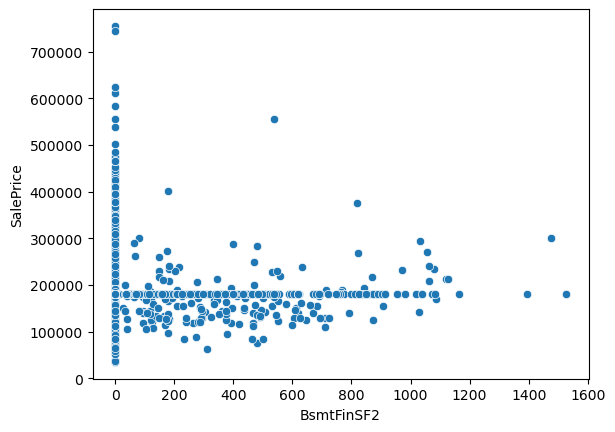

In [21]:
sns.scatterplot(x=df['BsmtFinSF2'],y=df['SalePrice'])